### AR Model

yt = c + phi1 * yt_1 + phi2 * yt_2 + ... + phi_p * yt_p + epsilon_t

where:
- yt is the value at time t
- c is a constant term
- phi1, phi2, ..., phi_p are the coefficients for the lagged values
- yt_1, yt_2, ..., yt_p are the lagged values of yt
- epsilon_t is the white noise error term

For example, an AR(1) model can be expressed as:
yt = c + phi1 * yt_1 + epsilon_t

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
from statsmodels.tsa.ar_model import AutoReg, AutoRegResults

In [3]:
df = pd.read_csv(r'D:\Practice\Machine Learning Project\Forecasting\study\dataset-studying\uspopulation.csv', index_col="DATE", parse_dates=True)

In [4]:
df.index.freq = 'MS'  # Set the frequency to monthly start

In [5]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


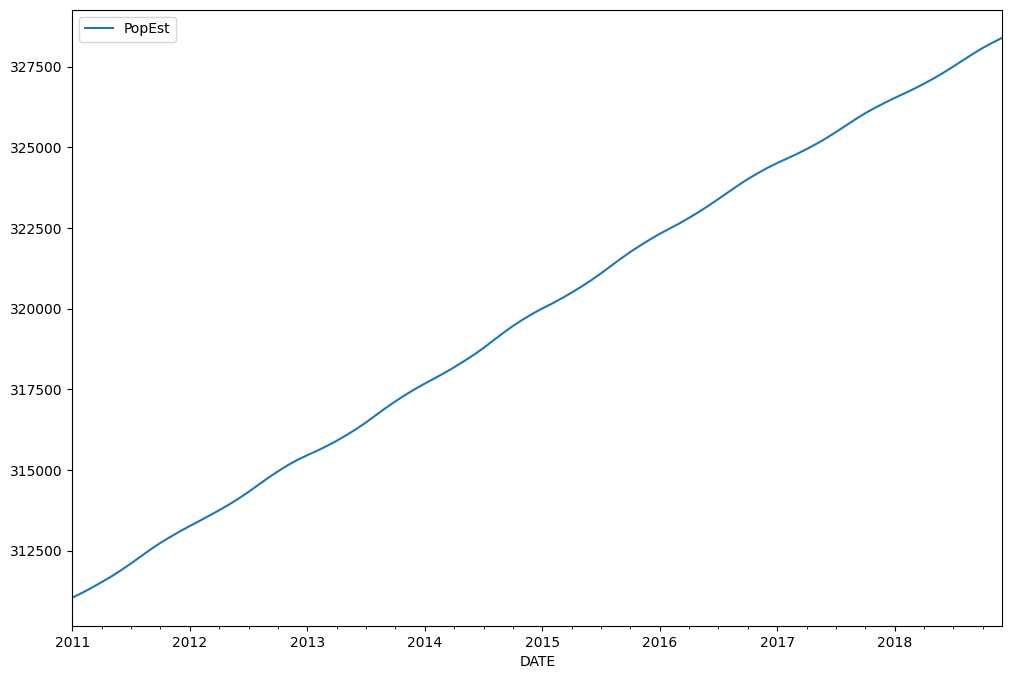

In [6]:
df.plot(figsize=(12,8));

In [7]:
train = df.iloc[:-12]  # All but the last 12 months
test = df.iloc[-12:]  # The last 12 months

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
from statsmodels.tsa.stattools import adfuller

model = AutoReg(train["PopEst"], lags=1, old_names=False)
model_fit = model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 PopEst   No. Observations:                   84
Model:                     AutoReg(1)   Log Likelihood                -380.819
Method:               Conditional MLE   S.D. of innovations             23.789
Date:                Wed, 06 Aug 2025   AIC                            767.638
Time:                        10:37:34   BIC                            774.894
Sample:                    02-01-2011   HQIC                           770.553
                         - 12-01-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        284.9138    185.428      1.537      0.124     -78.518     648.346
PopEst.L1      0.9997      0.001   1718.076      0.000       0.999       1.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0003           +0.0000j            1.0003            0.0000
-----------------------------------------------------------------------------
"""

RMSE: 132.097, MAE: 126.758


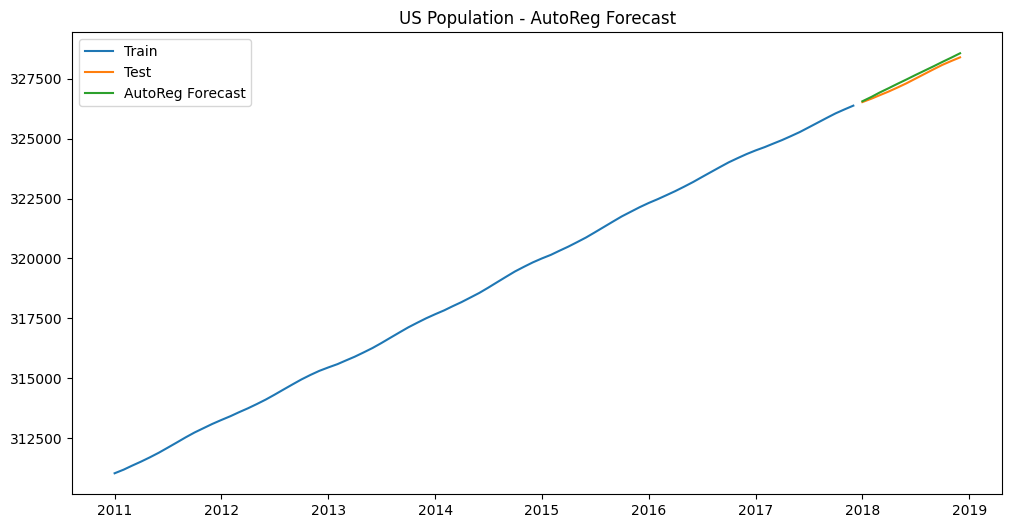

In [14]:
# Forecast for the length of the test set
start = len(train)
end = len(train) + len(test) - 1

# Generate predictions
preds = model_fit.predict(start=start, end=end, dynamic=False)

# Align predictions with test index
preds = pd.Series(preds, index=test.index)

# Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = mean_squared_error(test["PopEst"], preds, squared=False)
mae = mean_absolute_error(test["PopEst"], preds)
print(f"RMSE: {rmse:.3f}, MAE: {mae:.3f}")

# Plot
plt.figure(figsize=(12,6))
plt.plot(train.index, train["PopEst"], label="Train")
plt.plot(test.index, test["PopEst"], label="Test")
plt.plot(preds.index, preds, label="AutoReg Forecast")
plt.legend()
plt.title("US Population - AutoReg Forecast")
plt.show()
